In [2]:
from SpectrumAnalysis.SpectrumAnalysis import SpectrumAnalysis
project_data_filename = 'humidity_analysis.fits'
analyzer = SpectrumAnalysis(metadata_filename = project_data_filename)

Processing file preprocessed_data\Background_Noise.fits
Processing file preprocessed_data\Polarizer_35deg_THz_pulse_Aperture.fits
Processing file preprocessed_data\THz_pulse_Aperture.fits
Press the index number to choose the file to read into the hdu
Press 's' to skip the addition of HDU
Press 'e' to end the addition of HDU
Press 'n' to go to the next zip file
Press 'p' to go to the previous zip file
HDU 'REF1' already exists. Skipping...
HDU 'SAMPLE1' already exists. Skipping...
------------------------------
Please select the FITS file to add as HDU 'REF2' (press 'h' for help):
Available files:
0: Background_Noise.fits
1: Polarizer_35deg_THz_pulse_Aperture.fits
2: THz_pulse_Aperture.fits
Ending the addition of HDU.
------------------------------
Filename: ./humidity_analysis.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  REF1          1 ImageHDU        21   (26, 500, 1)   float64   
  2  SAMPLE1       1 Image

In [8]:

analyzer.show_info()

Filename: humidity_analysis.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  SAMPLE1       1 ImageHDU        21   (51, 500, 1)   float64   
  2  STAT_REF1     1 BinTableHDU     23   7R x 1C   [PE(1044)]   
  3  STAT_SAMPLE1    1 BinTableHDU     23   7R x 1C   [PE(1044)]   
  4  REF1          1 ImageHDU        21   (26, 500, 1)   float64   
Primary HDU Info:
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  FILENAME= 'humidity_analysis.fits'                                              AUTHOR  = 'Albert_Wu'                                                           DATE    = '2025_05_11'                                                          HIERAR

HDU STAT_REF1 not found in humidity_analysis.fits.
Adding STAT_REF1 to the FITS file.
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                   26                                                  NAXIS2  =                  500                                                  NAXIS3  =                    1                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               DATE    = '2025_05_07'                                                          AUTHOR  = 'Albert_Wu'                                                           POWER   =                0.437                                                  PLACE   = 'BRK_B14D'              

<Figure size 1000x400 with 0 Axes>

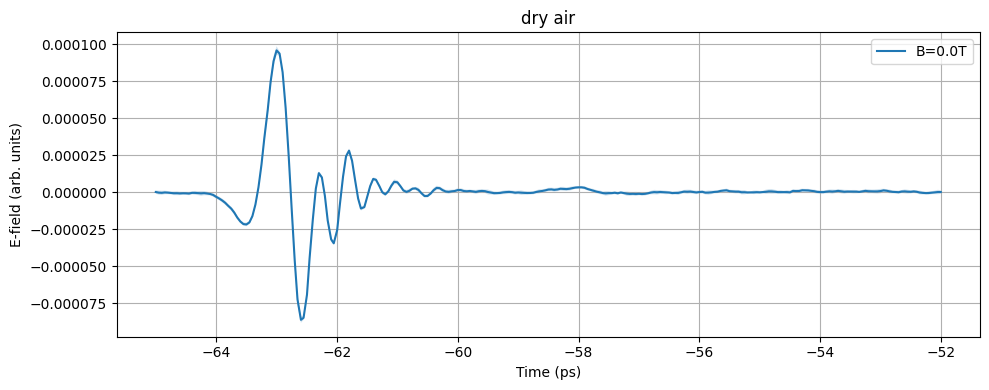

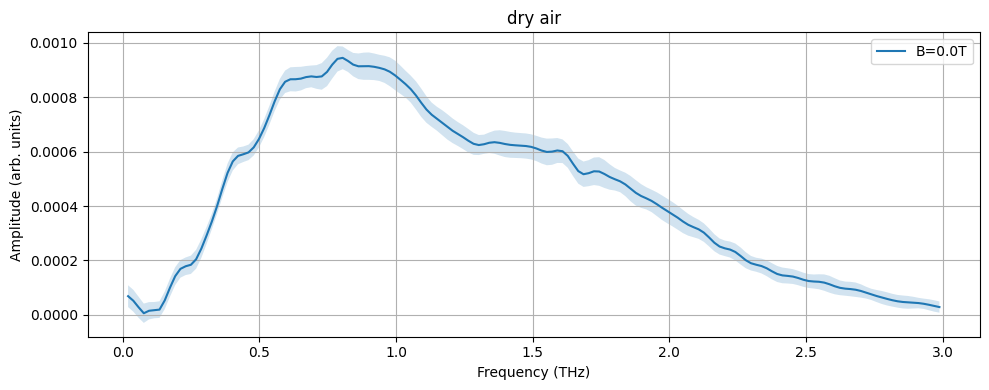

Plots saved to ./.


In [3]:
hdu_id = 'REF1'
analyzer.plot_statistics(hdu_id=hdu_id, title='dry air', time_range=[-65, -52], zero_padding_ratio=4, freq_range=[0, 3.])

HDU STAT_SAMPLE1 not found in humidity_analysis.fits.
Adding STAT_SAMPLE1 to the FITS file.
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                   51                                                  NAXIS2  =                  500                                                  NAXIS3  =                    1                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               DATE    = '05_02_2025'                                                          AUTHOR  = 'Albert_Wu'                                                           POWER   =                0.436                                                  PLACE   = 'BRK_B14D'        

<Figure size 1000x400 with 0 Axes>

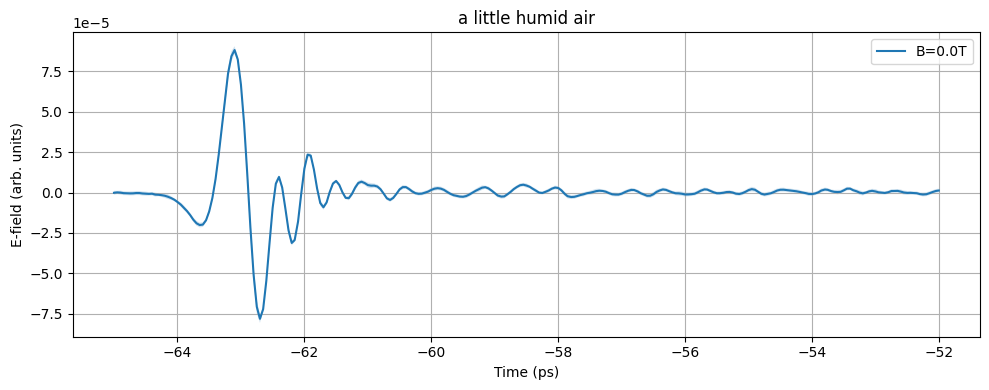

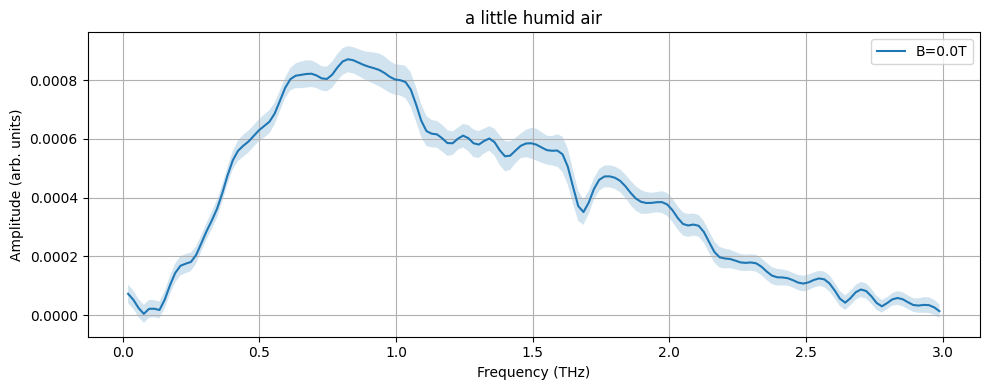

Plots saved to ./.


In [5]:
hdu_id = 'SAMPLE1'
analyzer.plot_statistics(hdu_id=hdu_id, title='a little humid air', time_range=[-65, -52], zero_padding_ratio=4, freq_range=[0, 3.])

HDU STAT_SAMPLE2 not found in humidity_analysis.fits.


Adding STAT_SAMPLE2 to the FITS file.
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                   51                                                  NAXIS2  =                  500                                                  NAXIS3  =                    1                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               DATE    = '05_04_2025'                                                          AUTHOR  = 'Albert_Wu'                                                           POWER   =                0.434                                                  PLACE   = 'BRK_B14D'                                                            GE

<Figure size 1000x400 with 0 Axes>

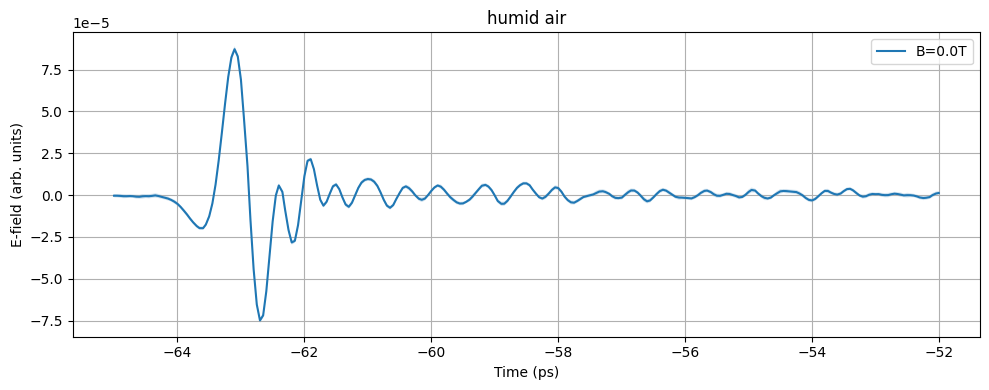

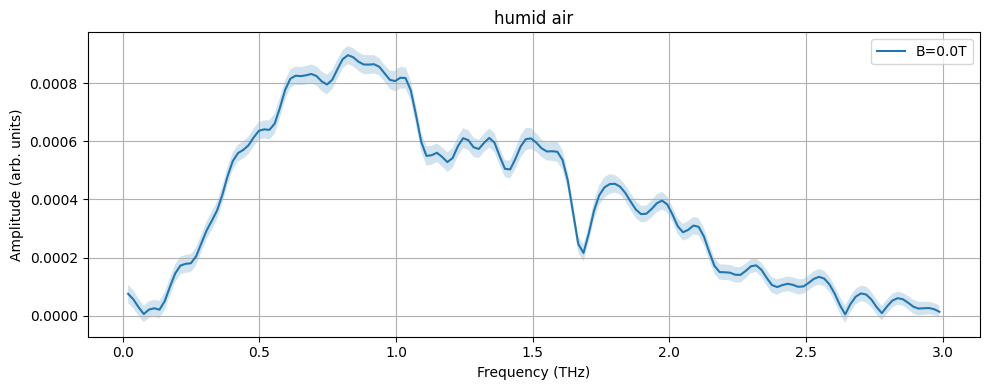

Plots saved to ./.


In [4]:
hdu_id = 'SAMPLE2'
analyzer.plot_statistics(hdu_id=hdu_id, title='humid air', time_range=[-65, -52], zero_padding_ratio=4, freq_range=[0, 3.])

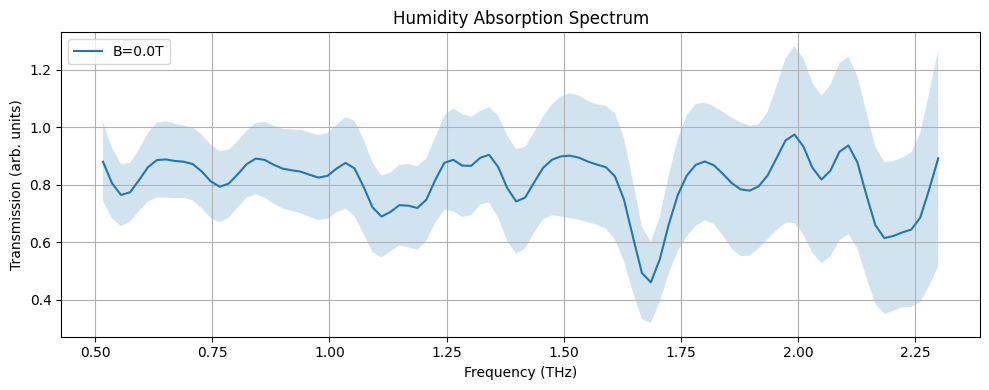

In [5]:
hdu_tr_id = 'SAMPLE1'
hdu_ref_id = 'REF1'
freqs, trans_avg1, trans_std1 = analyzer.plot_transmission_spec(hdu_tr_id, hdu_ref_id, B_field='all', freq_range=[0.5, 2.3], title= 'Humidity Absorption Spectrum')

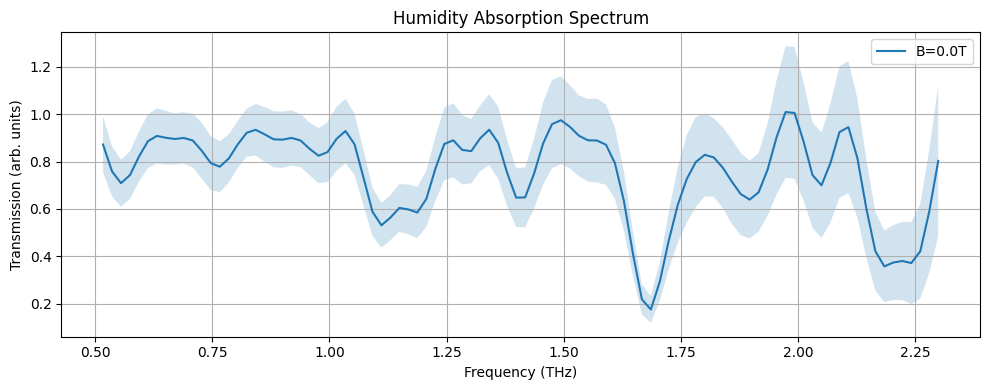

In [3]:
hdu_tr_id = 'SAMPLE2'
hdu_ref_id = 'REF1'
freqs, trans_avg2, trans_std2 = analyzer.plot_transmission_spec(hdu_tr_id, hdu_ref_id, B_field='all', freq_range=[0.5, 2.3], title= 'Humidity Absorption Spectrum')

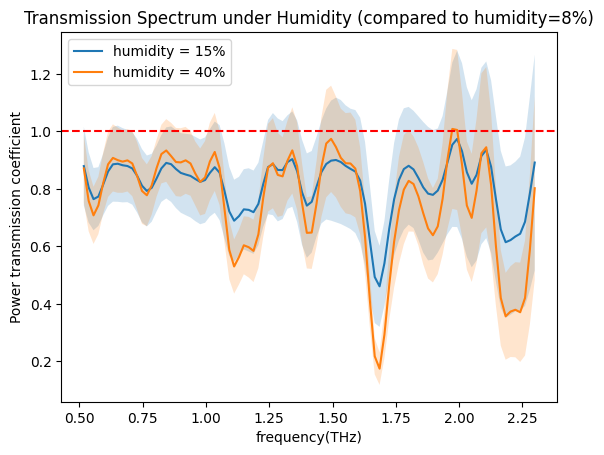

In [18]:
import matplotlib.pyplot as plt 
plt.plot(freqs[0], trans_avg1[0], label ='humidity = 15%')
plt.plot(freqs[0], trans_avg2[0], label ='humidity = 40%')
plt.fill_between(freqs[0], trans_avg1[0] - trans_std1[0], trans_avg1[0] + trans_std1[0], alpha=0.2)
plt.fill_between(freqs[0], trans_avg2[0] - trans_std2[0], trans_avg2[0] + trans_std2[0], alpha=0.2)
plt.axhline(y=1.0, color='r', linestyle='--')
plt.xlabel('frequency(THz)')
plt.ylabel('Power transmission coefficient')
plt.title('Transmission Spectrum under Humidity (compared to humidity=8%)')
plt.legend(loc='best')